In [1]:
# An analysis of the notebook and its conlucions can be found at:

In [ ]:
#We first import some libraries and read de dataset

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/Users/inigo/Desktop/Projects/Datasets"
csv_path=os.path.join(path,"netflix_and_imbd.csv")
netflix=pd.read_csv(csv_path)

In [3]:
netflix['listed_in'].value_counts()
netflix['listed_in'].value_counts().size
#Too much classes, we just obtain the first 50 (the most common 50)

content_type=netflix['listed_in'].value_counts().iloc[0:50]

#We do some feature enginearing 

#Unify some of the similiar types by the "strongest wins" criterium:
#We dont need to diferenciate between international series, or TV/Movies dramas, we have other columns to do so

netflix=netflix.replace({'listed_in': 'Dramas, Independent Movies, International Movies'}, {'listed_in': 'Dramas'},regex=True)
netflix=netflix.replace({'listed_in': 'Dramas, International Movies'}, {'listed_in': 'Dramas'},regex=True)
netflix=netflix.replace({'listed_in': 'Dramas, Independent Movies'}, {'listed_in': 'Dramas'},regex=True)
netflix=netflix.replace({'listed_in': 'TV Dramas'}, {'listed_in': 'Dramas'},regex=True)
netflix=netflix.replace({'listed_in': 'International TV Shows, TV Dramas'}, {'listed_in': 'Dramas'},regex=True)

#For documentaries
netflix=netflix.replace({'listed_in':'Documentaries, International Movies'}, {'listed_in': 'Documentaries'},regex=True) 

#For horror movies
netflix=netflix.replace({'listed_in':'Horror Movies, International Movies,'}, {'listed_in': 'Horror Movies'},regex=True)
netflix=netflix.replace({'listed_in':'Horror Movies, Thrillers'}, {'listed_in': 'Horror Movies'},regex=True)

#Thrillers
netflix=netflix.replace({'listed_in':'Dramas, Thrillers'}, {'listed_in': 'Thrillers'},regex=True)
netflix=netflix.replace({'listed_in':'International Movies, Thrillers'}, {'listed_in': 'Thrillers'},regex=True)

#Action
netflix=netflix.replace({'listed_in':'Action & Adventure, International Movies '}, {'listed_in': 'Action & Adventure'},regex=True)
netflix=netflix.replace({'listed_in':'Action & Adventure, Dramas'}, {'listed_in': 'Action & Adventure'},regex=True)

#Comedies in 3 groups: comedies, drama/comedies and romantic/comedies
netflix=netflix.replace({'listed_in':'Stand-Up Comedy'}, {'listed_in': 'Comedies'},regex=True)
netflix=netflix.replace({'listed_in':'Action & Adventure, Comedies, International Movies'}, {'listed_in': 'Comedies'},regex=True)
netflix=netflix.replace({'listed_in':'TV Comedies'}, {'listed_in': 'Comedies'},regex=True)
netflix=netflix.replace({'listed_in':'Comedies, International Movies'}, {'listed_in': 'Comedies'},regex=True)

netflix=netflix.replace({'listed_in':'Comedies, Dramas, Independent Movies'}, {'listed_in': 'Comedies, Dramas'},regex=True)

netflix=netflix.replace({'listed_in':'Comedies, International Movies, Romantic Movies'}, {'listed_in': 'Comedies, Romantic Movies'},regex=True)

#Kids TV all in one
netflix=netflix.replace({'listed_in': "Kids' TV, TV Comedies"}, {'listed_in': "Kids' TV"},regex=True)
netflix=netflix.replace({'listed_in': "Kids' TV, Comedies"}, {'listed_in': "Kids' TV"},regex=True)
netflix=netflix.replace({'listed_in': "Children & Family Movies, Comedies"}, {'listed_in': "Children & Family Movies"},regex=True)


#We have to delete the instances with listed_in: Movies. They dont give information and wont be useful in future
netflix=netflix[netflix['listed_in'] != 'Movies']

#We delete movies that for some reason have a 0.0 rating
netflix=netflix[netflix['rating'] != 0.0]

content_type=netflix['listed_in'].value_counts().iloc[0:50]

In [4]:
#We delete some features, we prepara de df to feed the clustering algorithms

netflix=netflix.dropna(axis=0)
netflix.drop(netflix.iloc[:,[0,2,4,6,9,11]],axis=1,inplace=True)

#Form a full numerical valued dataset:

# Type

netflix['type']=netflix['type'].astype('category')
d1 = dict(enumerate(netflix['type'].cat.categories)) #To save old values
netflix['type']=netflix['type'].cat.codes

#Director

netflix['director']=netflix['director'].astype('category')
d2 = dict(enumerate(netflix['director'].cat.categories)) #To save old values
netflix['director']=netflix['director'].cat.codes

#Country

netflix['country']=netflix['country'].astype('category')
d3 = dict(enumerate(netflix['country'].cat.categories)) #To save old values
netflix['country']=netflix['country'].cat.codes

# Listed_in

netflix['listed_in']=netflix['listed_in'].astype('category')
d4 = dict(enumerate(netflix['listed_in'].cat.categories)) #To save old values
netflix['listed_in']=netflix['listed_in'].cat.codes

netflix.head()

,type,director,country,release_year,rating,listed_in
0,0,2442,428,2019,4.1,73
4,0,899,379,2017,5.7,111
6,0,938,44,2014,6.1,219
7,0,2517,65,2017,4.9,111
9,0,1086,458,2014,5.6,48


In [382]:
import seaborn as sns
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score


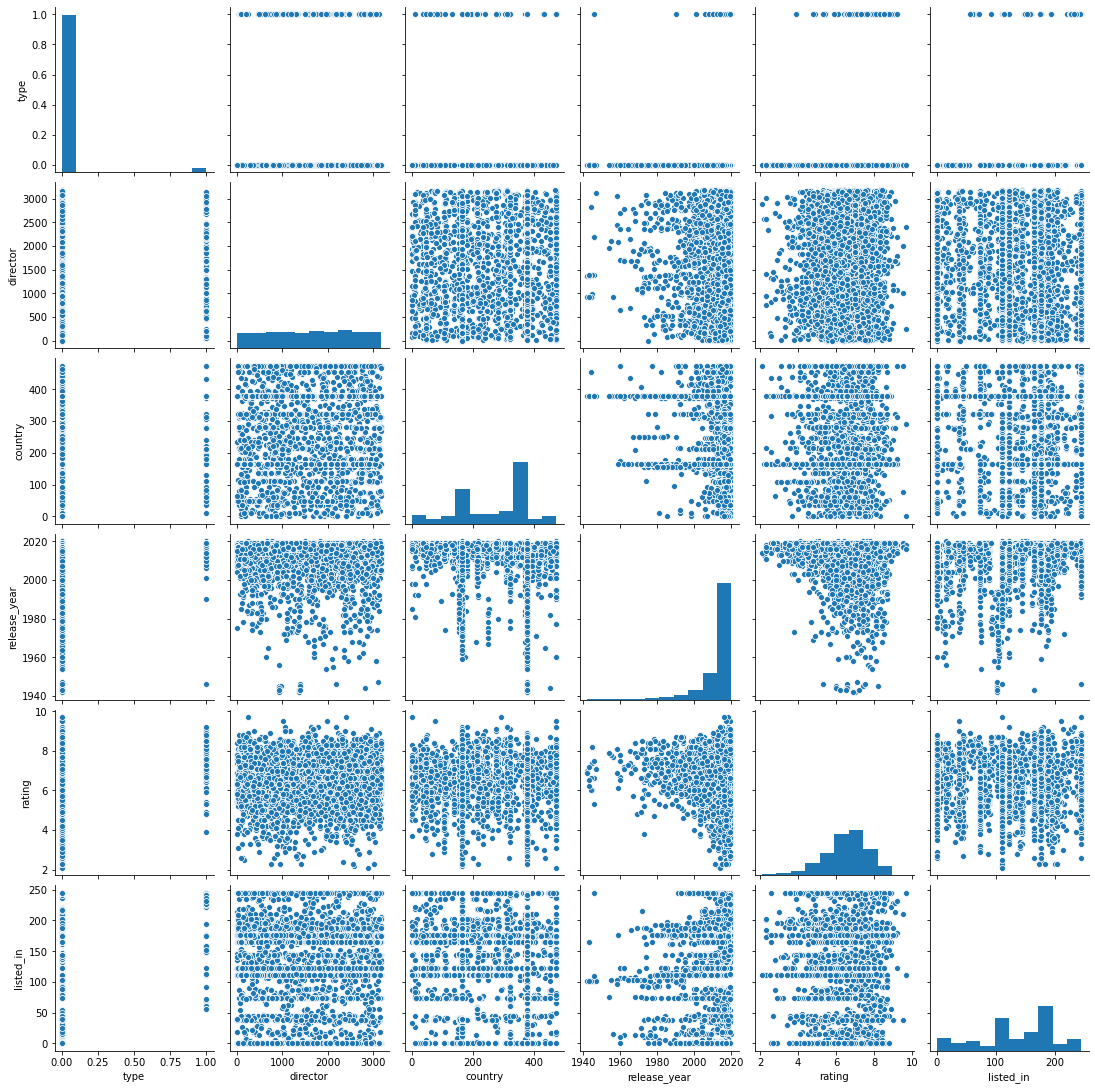

In [385]:
sns_plot=sns.pairplot(netflix, diag_kind="hist") #All features against each other
sns_plot.savefig("/Users/inigo/Desktop/Projects/Netflix/Figures/PairPlot")

Text(0.5, 1.0, 'Correlation matrix')

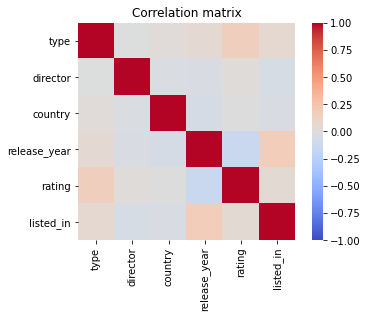

In [153]:
#Some representations

sns_plot=sns.pairplot(netflix, hue="type", diag_kind="hist") #All features against each other

ax = sns.heatmap(netflix.corr(), 
                vmin=-1, vmax=1, center=0,
                cmap='coolwarm',
                square=True
)
ax.set_xticklabels( ax.get_xticklabels() )
ax.set_title('Correlation matrix')

#We see that they are not correlated, but some trasnformations are needed

In [171]:
#We transform the data

netflix_standarized = pd.DataFrame(StandardScaler().fit_transform(netflix), 
                               columns = netflix.columns)

#Perform a PCA to visualize clusters

pca=PCA(n_components=2)
netflix_pca=pd.DataFrame(pca.fit_transform(netflix_standarized))

For n_clusters = 2 The average silhouette_score is : 0.564576649030924
For n_clusters = 3 The average silhouette_score is : 0.2030221329057553
For n_clusters = 4 The average silhouette_score is : 0.22108190087113233
For n_clusters = 5 The average silhouette_score is : 0.2145716016329748
For n_clusters = 6 The average silhouette_score is : 0.20473908589745002
For n_clusters = 7 The average silhouette_score is : 0.20939666789596081


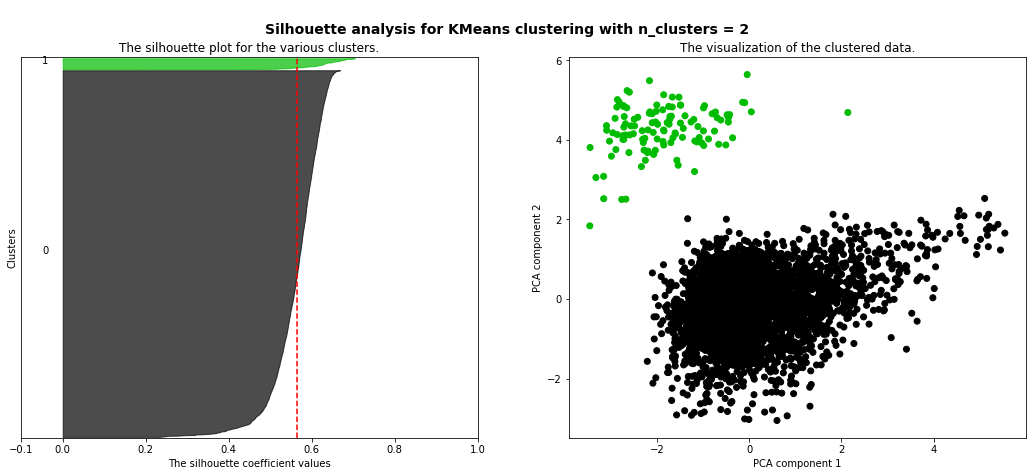

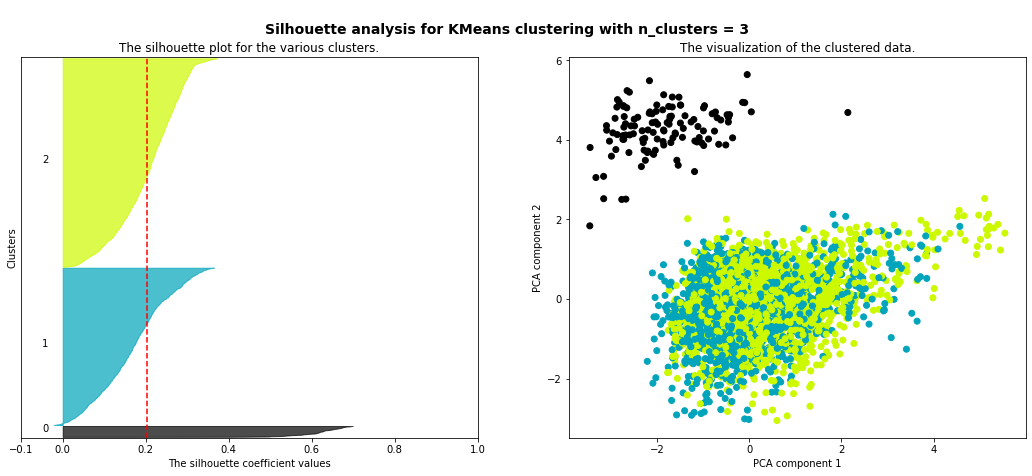

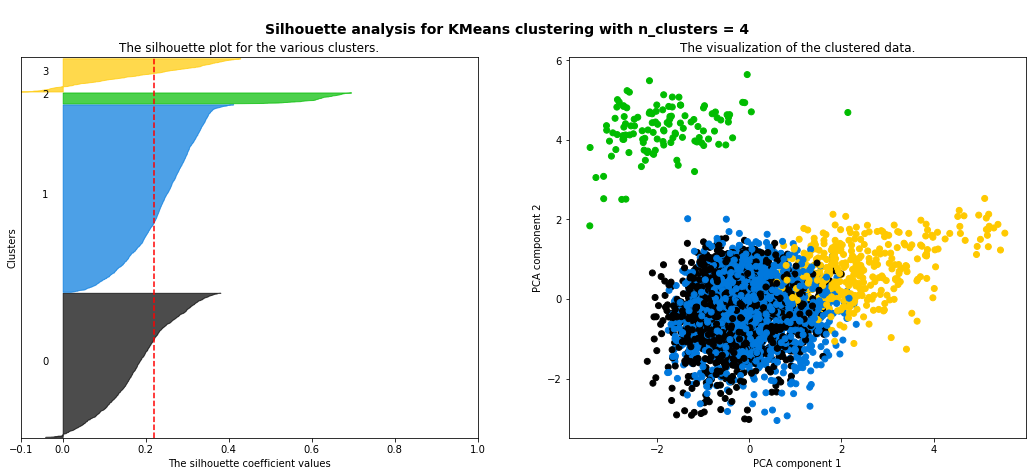

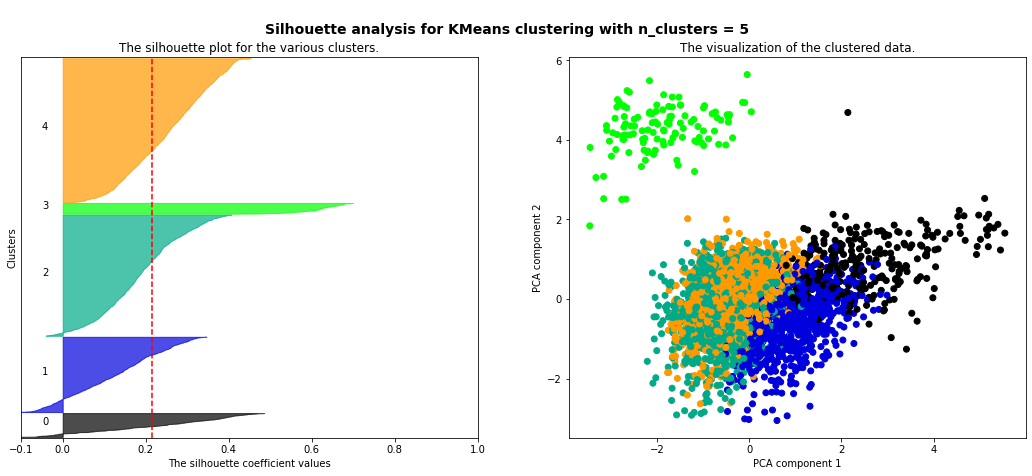

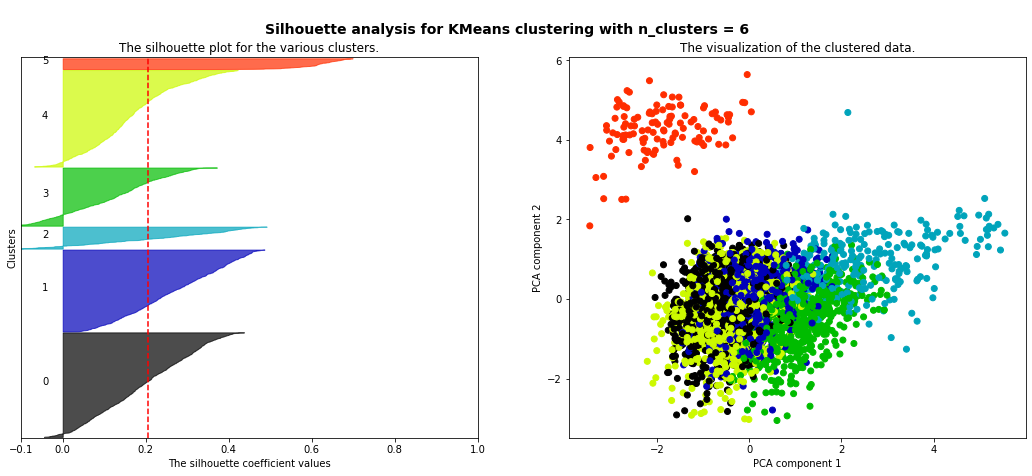

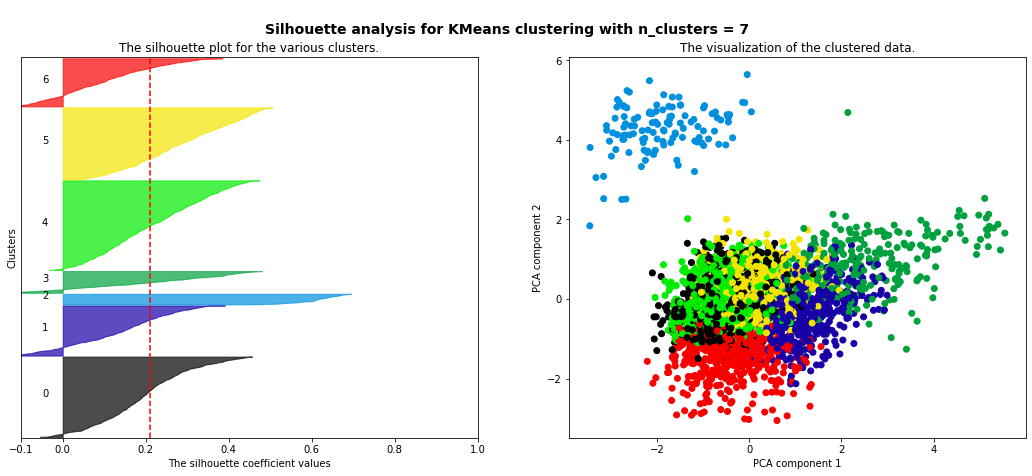

In [386]:
###   PARTITIONAL CLUSTERING

silhouette_analysis(np.array(netflix_standarized), 
                    netflix_pca, 
                    [2, 3, 4, 5, 6, 7])


In [432]:
#Taken from bla bla

def silhouette_analysis(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Clusters")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("PCA component 1")
        ax2.set_ylabel("PCA component 2")

        plt.suptitle(("\nSilhouette analysis for KMeans clustering "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

def silhouette_analysis2(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = AgglomerativeClustering(n_clusters = n_clusters,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Clusters")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("PCA component 1")
        ax2.set_ylabel("PCA component 2")

        plt.suptitle(("\nSilhouette analysis for Agglomerative clustering "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

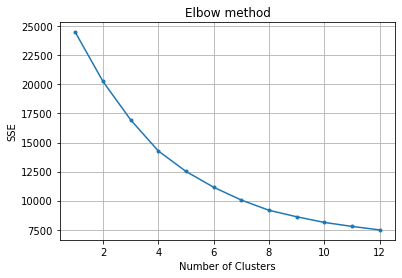

In [387]:
# To help choose the number of clusters, elbow method:

sse = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(netflix_standarized)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 13), sse,'.-')
plt.grid(b=True)
#plt.xticks(range(1, 11))
plt.title("Elbow method")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

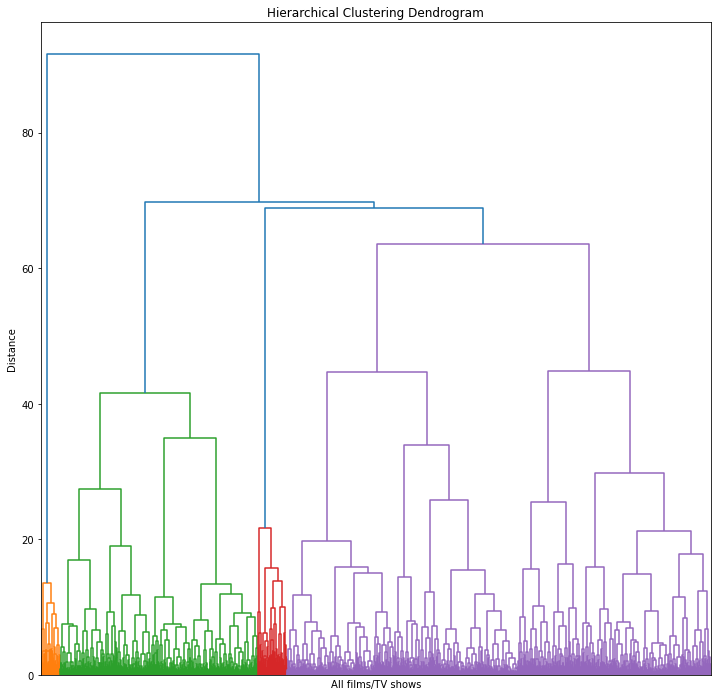

In [194]:
###   HIERARCHICAL CLUSTERING

distances_linkage = linkage(netflix_standarized,
                            method = 'ward', 
                            metric = 'euclidean')

#The distance function can be:
#   ‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘cityblock’, ‘correlation’, ‘cosine’, ‘dice’, 
#   ‘euclidean’, ‘hamming’, ‘jaccard’, ‘jensenshannon’, ‘kulsinski’, ‘mahalanobis’, ‘matching’, ‘minkowski’, ‘rogerstanimoto’
#   ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’.                       

plt.figure(figsize=(12, 12))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Distance')

dendrogram(
    distances_linkage,
    no_labels = True
)

plt.show()

For n_clusters = 2 The average silhouette_score is : 0.5629717358880473
For n_clusters = 3 The average silhouette_score is : 0.14713422234233484
For n_clusters = 4 The average silhouette_score is : 0.17285255232265997
For n_clusters = 5 The average silhouette_score is : 0.17179215829981898
For n_clusters = 6 The average silhouette_score is : 0.16658008715426595
For n_clusters = 7 The average silhouette_score is : 0.15360107169582035


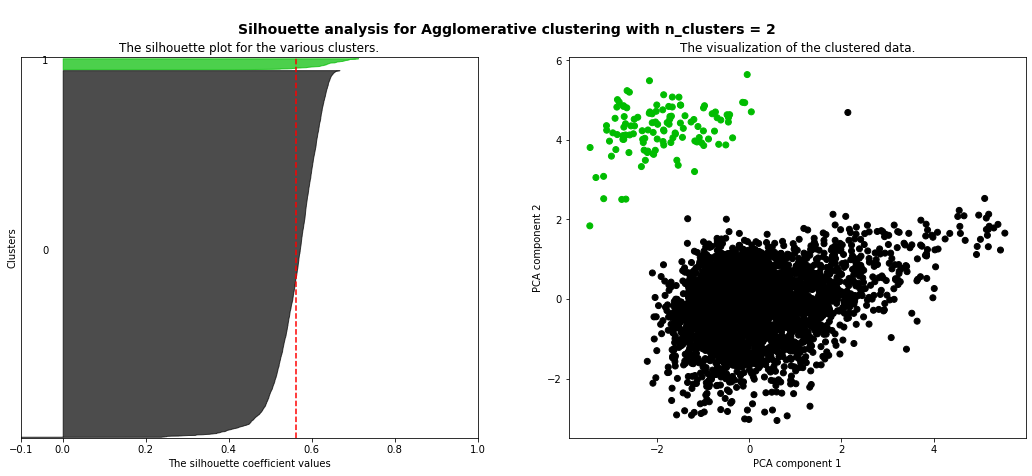

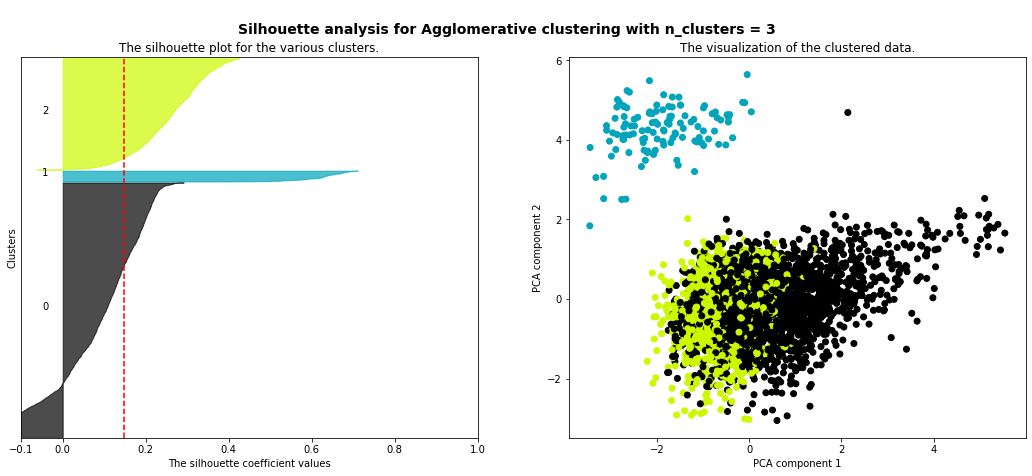

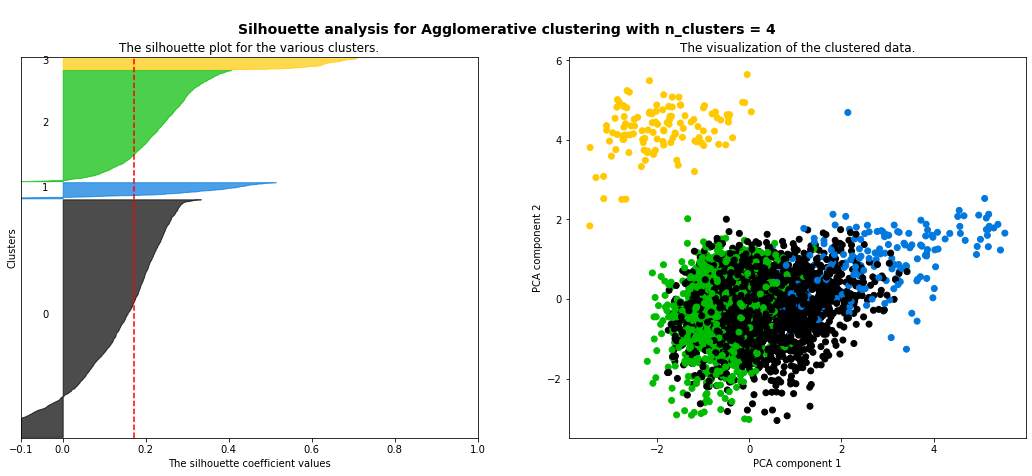

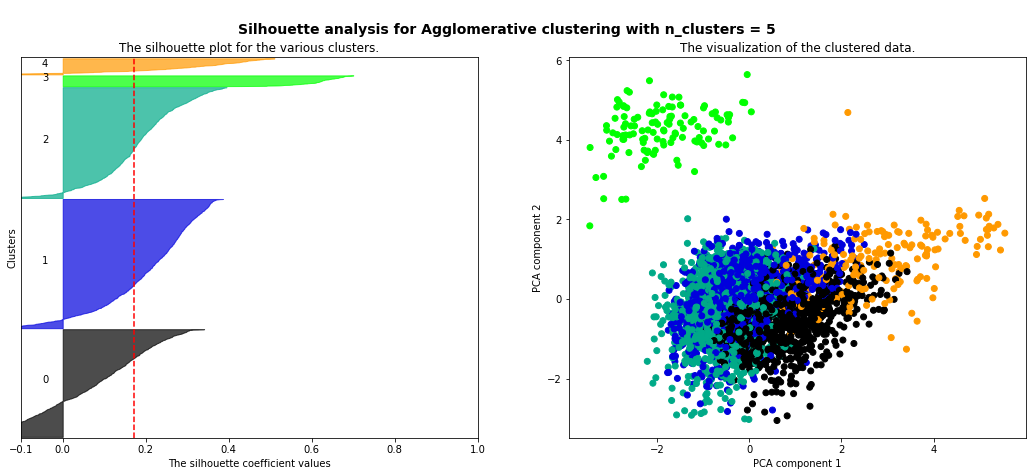

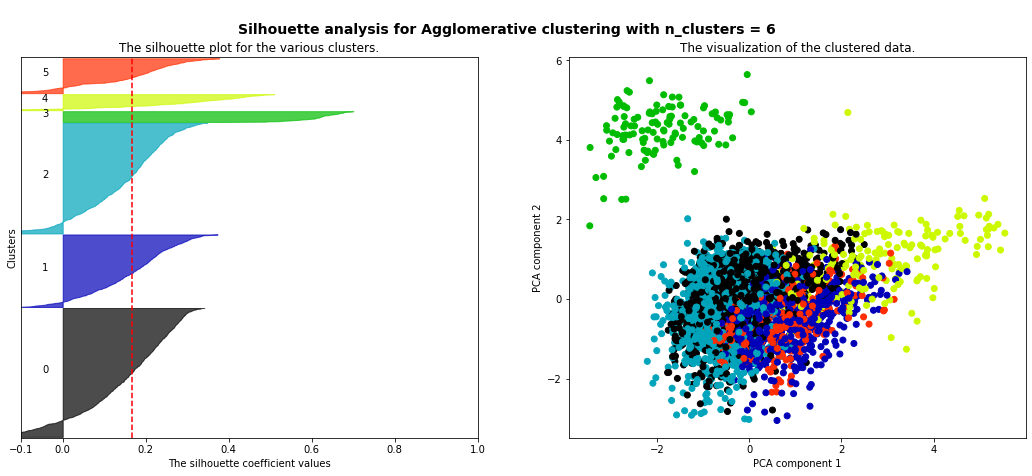

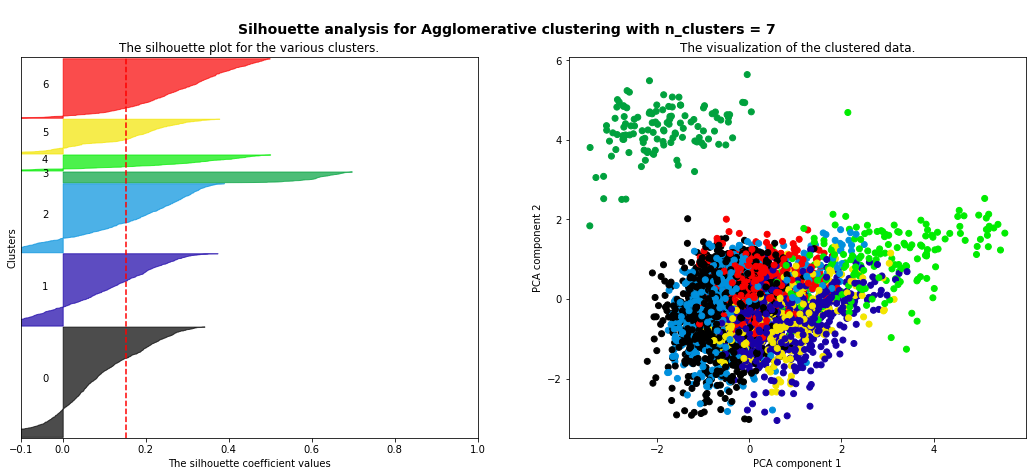

In [433]:
silhouette_analysis2(np.array(netflix_standarized), 
                    netflix_pca, 
                    [2, 3, 4, 5, 6, 7])

In [ ]:
# MODEL INTERPRETATION
# We try to gain new knowledge using the previous clustering

sns_plot=sns.pairplot(netflix, hue="type", diag_kind="hist") #All features against each other

In [390]:
kmeans = KMeans(n_clusters = 4,random_state=42)
kmeans.fit(netflix_standarized)
netflix['cluster'] = kmeans.labels_

In [410]:
d1

{0: 'Movie', 1: 'TV Show'}

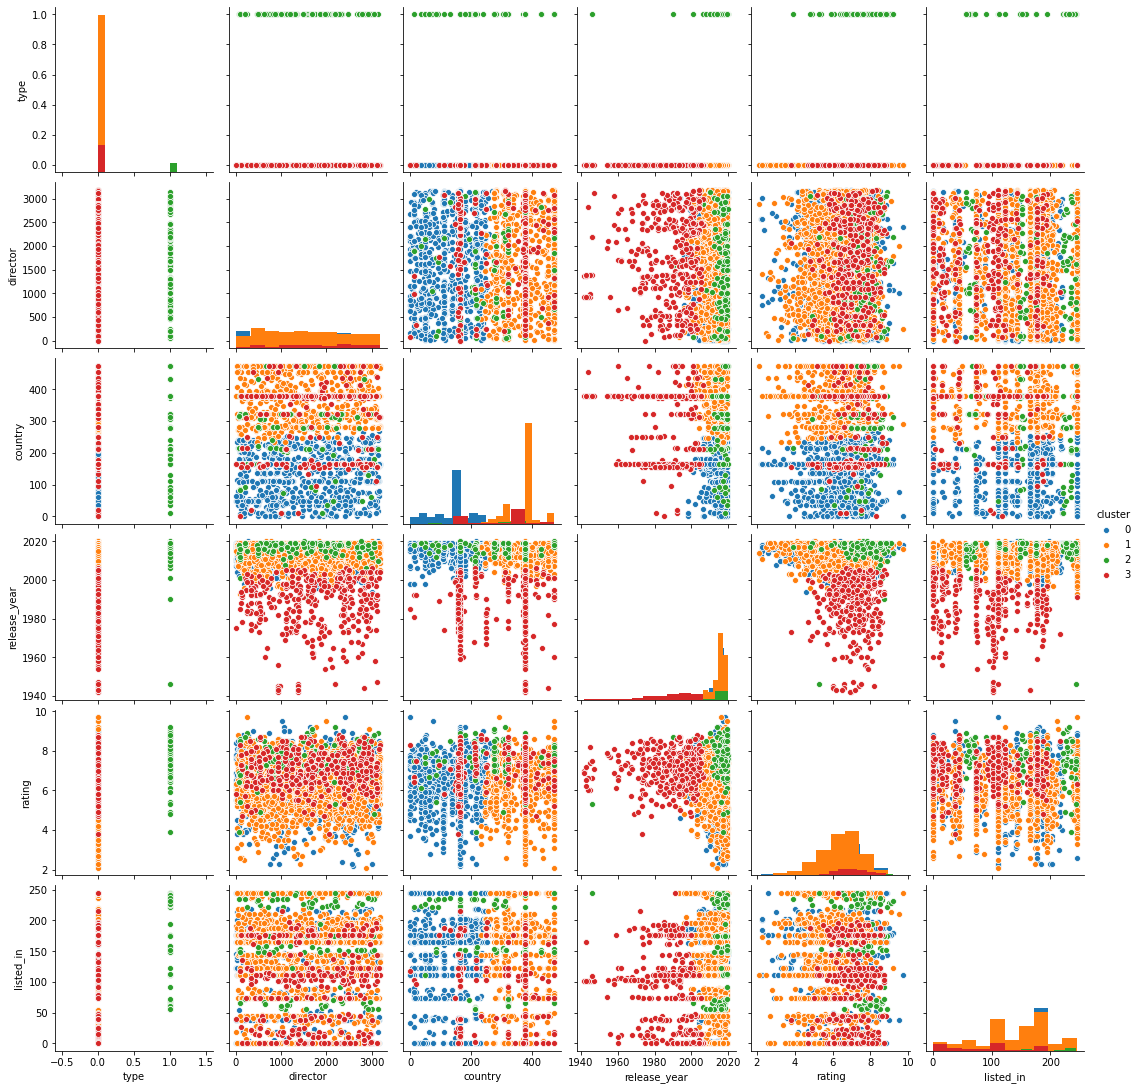

In [392]:
sns_plot=sns.pairplot(netflix, hue="cluster", diag_kind="hist") #All features against each other
sns_plot.savefig("/Users/inigo/Desktop/Projects/Netflix/Figures/PairPlotCLUSTERED")

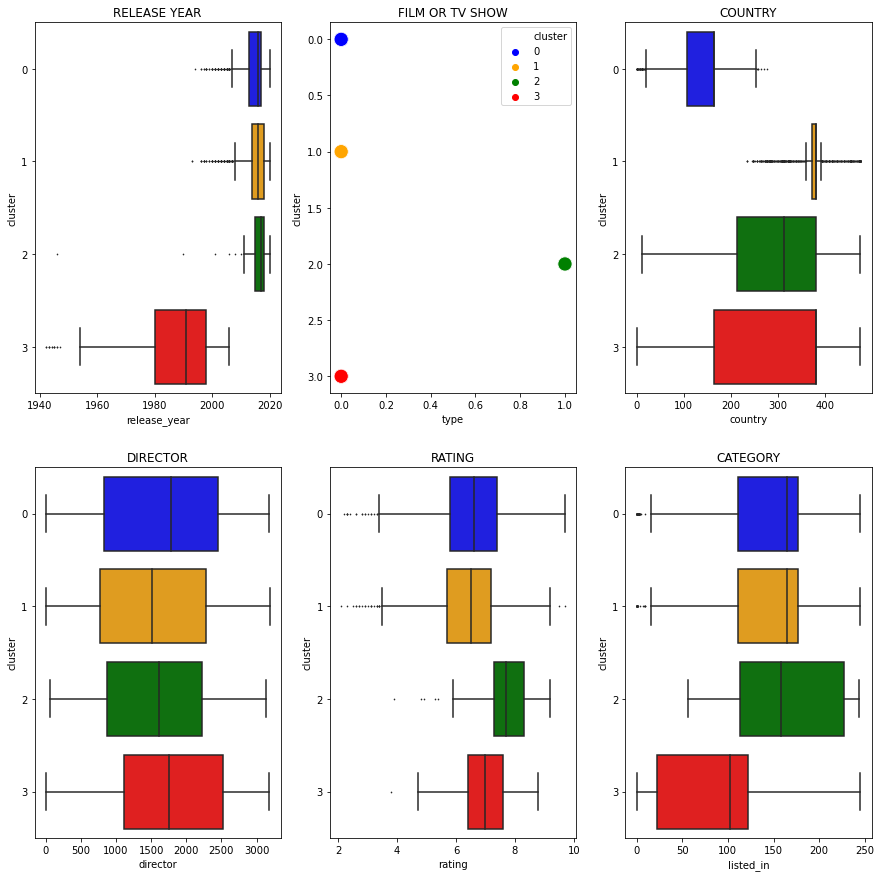

In [393]:
#We also plot some boxplots for our clusters

fig, ((ax10,ax2,ax3),(ax4,ax5,ax6))= plt.subplots(2, 3)
fig.set_size_inches(15, 15)

plt.subplot(2, 3, 1)
ax1=sns.boxplot(x='release_year',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax1.set_title('RELEASE YEAR')

plt.subplot(2, 3, 2)
ax2=sns.scatterplot(x='type',
            y='cluster',
            hue='cluster',
            data=netflix,
            s=200,
            palette=['b','orange','g','r']
           )
ax2.invert_yaxis()
ax2.set_title('FILM OR TV SHOW')

plt.subplot(2, 3, 3)
ax3=sns.boxplot(x='country',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax3.set_title('COUNTRY')

plt.subplot(2, 3, 4)
ax4=sns.boxplot(x='director',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax4.set_title('DIRECTOR')

plt.subplot(2, 3, 5)
ax4=sns.boxplot(x='rating',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax4.set_title('RATING')

plt.subplot(2, 3, 6)
ax4=sns.boxplot(x='listed_in',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax4.set_title('CATEGORY')

fig.savefig("/Users/inigo/Desktop/Projects/Netflix/Figures/Crema")


In [9]:
#We check for their codificated values to interpret the results:


d1 #For 'type'

d2 #For 'director' 

d3 #For 'Country'

d4 #For 'listed_in' (category)

#We interpret a lot of stuff from here

In [10]:
d4

{0: 'Action & Adventure',
 1: 'Action & Adventure, Anime Features, Children & Family Movies',
 2: 'Action & Adventure, Anime Features, Horror Movies',
 3: 'Action & Adventure, Anime Features, International Movies',
 4: 'Action & Adventure, Anime Features, Sci-Fi & Fantasy',
 5: 'Action & Adventure, Children & Family Movies',
 6: 'Action & Adventure, Children & Family Movies, Classic Movies',
 7: 'Action & Adventure, Children & Family Movies, Dramas',
 8: 'Action & Adventure, Children & Family Movies, Independent Movies',
 9: 'Action & Adventure, Children & Family Movies, Sci-Fi & Fantasy',
 10: 'Action & Adventure, Classic Movies',
 11: 'Action & Adventure, Classic Movies, Comedies',
 12: 'Action & Adventure, Classic Movies, Cult Movies',
 13: 'Action & Adventure, Classic Movies, Dramas',
 14: 'Action & Adventure, Classic Movies, International Movies',
 15: 'Action & Adventure, Classic Movies, Sci-Fi & Fantasy',
 16: 'Action & Adventure, Comedies',
 17: 'Action & Adventure, Comedies, C

0.16459474613338781


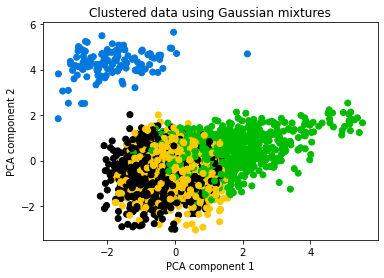

In [427]:
#GAUSSIAN MIXTURE

from sklearn import mixture

n_clusters=4

clusterer = mixture.GaussianMixture(n_components=n_clusters)

cluster_labels = clusterer.fit_predict(netflix_standarized)



colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

ax=plt.gca()
plt.scatter(netflix_pca[0], netflix_pca[1], c=colors)
    
ax.set_title("Clustered data using Gaussian mixtures")
ax.set_xlabel("PCA component 1")
ax.set_ylabel("PCA component 2")

plt.savefig("/Users/inigo/Desktop/Projects/Netflix/Figures/Mixtures")
silhouette_avg = silhouette_score(np.array(netflix_standarized), cluster_labels)
print(silhouette_avg)

In [405]:
def silhouette_analysis3(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = mixture.GaussianMixture(n_components=n_clusters)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10  

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Clusters")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("PCA component 1")
        ax2.set_ylabel("PCA component 2")

        plt.suptitle(("\nSilhouette analysis for Gaussian mixtures clustering "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 3 The average silhouette_score is : 0.16161091510088682
For n_clusters = 4 The average silhouette_score is : 0.1089773971701394
For n_clusters = 5 The average silhouette_score is : 0.12316928815832487
For n_clusters = 6 The average silhouette_score is : 0.07026934002330096


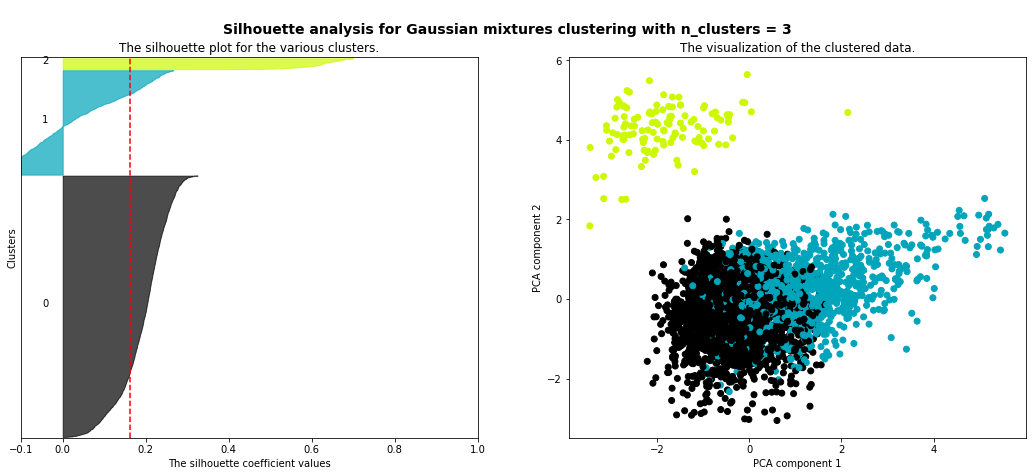

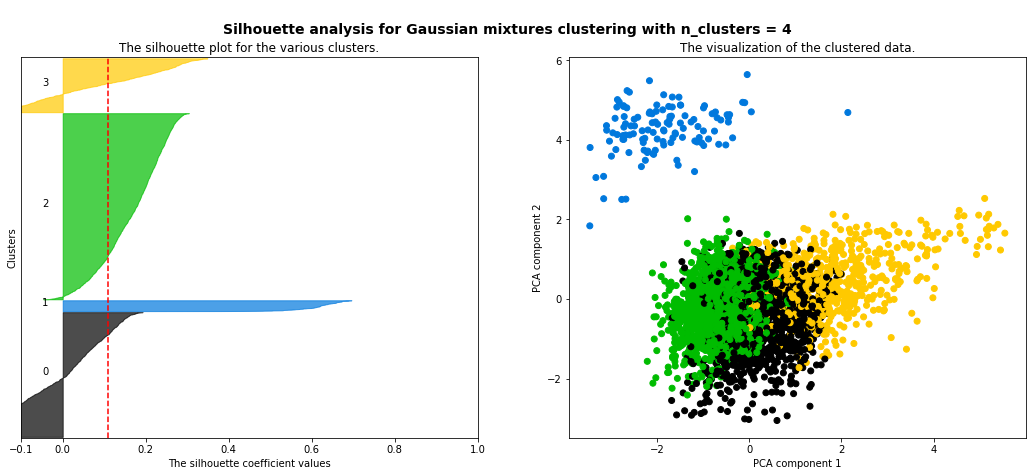

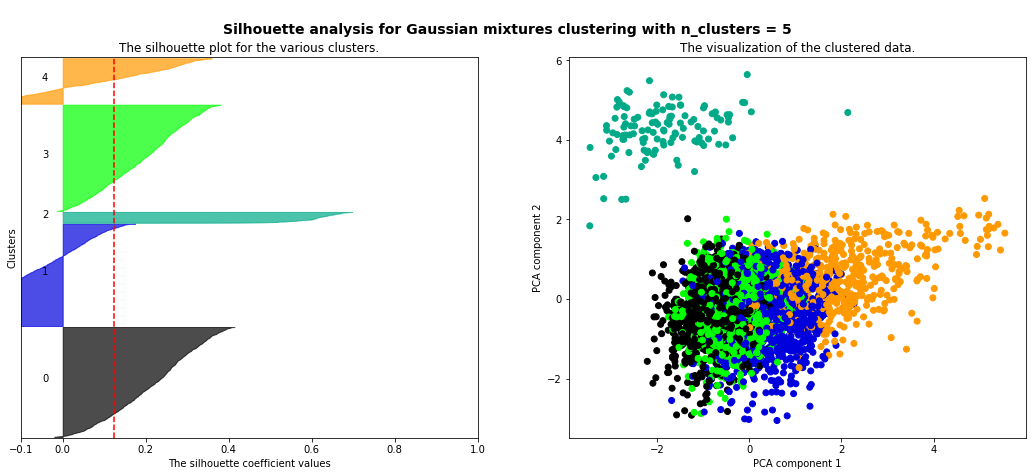

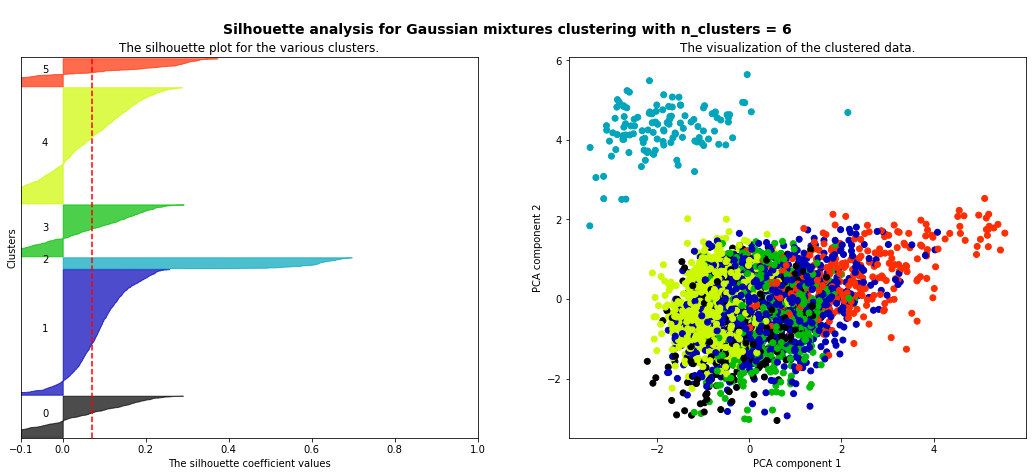

In [409]:
silhouette_analysis3(np.array(netflix_standarized), 
                    netflix_pca, 
                    [3,4,5,6])

In [408]:
# AFFINITY PROPAGATION

from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation(preference=-753,damping=0.60,verbose=True,random_state=0).fit(netflix_standarized) #Using euclidean distance as affinity estimator
#af = AffinityPropagation(damping=0.97,affinity='euclidean',verbose=True).fit(netflix) #Using euclidean distance
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
#print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(netflix_standarized, labels, metric='sqeuclidean'))



Converged after 93 iterations.
Estimated number of clusters: 8


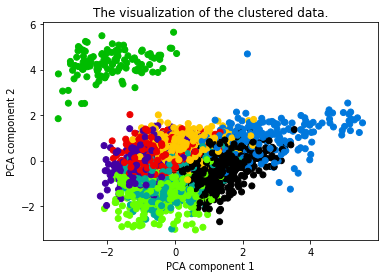

In [397]:
colors = cm.nipy_spectral(labels.astype(float) / n_clusters_)

ax=plt.gca()
plt.scatter(netflix_pca[0], netflix_pca[1], c=colors)
    
ax.set_title("The visualization of the clustered data.")
ax.set_xlabel("PCA component 1")
ax.set_ylabel("PCA component 2")
plt.savefig("/Users/inigo/Desktop/Projects/Netflix/Figures/Affinity")

In [378]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(netflix_standarized, labels, metric='sqeuclidean'))


Silhouette Coefficient: 0.302
